In [1]:
import numpy as np
import scipy.constants as scc
from matplotlib import pyplot as plt
import numpy as np
import scipy.constants as scc
import pandas as pd 
from IPython.display import display
from PIL import Image


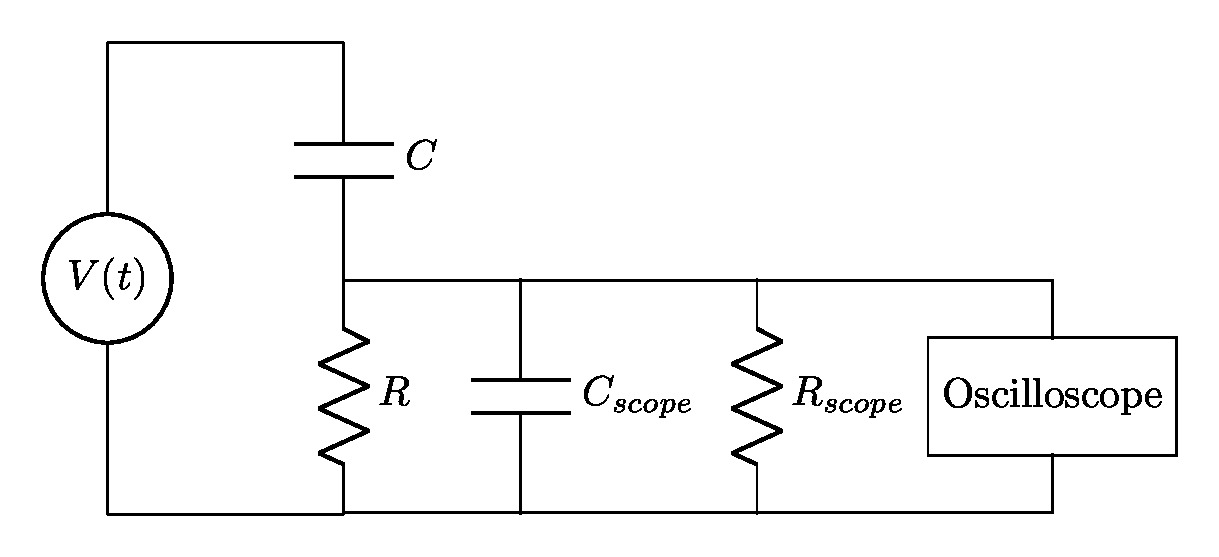

In [2]:
image = Image.open("Series_RC_circuit_picture.jpeg")  # No need for a full path
display(image)

# Circuit Impedence

The circuit consists of two impedences.  The capacitor, $X = \frac{-i}{\omega C}$ and the three components in parallel, $R$, $C_s$ and $R_s$, which we can call $Z_p$.  
for the rule for adding impedence in parallel, we have

$$
\frac{1}{Z_p} = \frac{1}{R} + \frac{1}{R_s} - \frac{i}{\omega C_s}
$$

We can refer to the real and imaginary parts of $Z_p$ as

$$
Z_p = r + i x
$$

---

# Analysis of load resistor voltage $V_R$

The voltage across the load resistor is given by the voltage divider formula with $V_0$ the input voltage.

$$
V_R = V_0 \frac{Z_p}{X_c + Z_p}
$$

If we define 

$$
A = \left|\frac{V_R}{V_0}\right|
$$

Then 

$$
A = \left| \frac{Z_p}{X_c + Z_p}\right|
$$

---

# Solving for $C$

We can expand the result in terms of $x$, $r$ $C$ and $\omega$. 

$$
A^2 = \frac{r^2 + x^2}{r^2 + \left(x -1/\omega C\right)^2} = \frac{\omega^2 C^2 \left(r^2 + x^2\right) }{\omega^2 C^2 r^2 + \left(\omega C x  -1 \right)^2}
$$


This can be expanded into a quadratic equation

$$
A^2\omega^2 C^2 \left(r^2 + x^2\right) -2A^2\omega C x + A^2 = \omega^2 C^2 \left(r^2 + x^2\right)
$$

Collecting terms in $C$

$$
C^2\omega^2\left(r^2 + x^2\right)\left(A^2-1\right) -2CA^2\omega x + A^2 = 0
$$

if we let $a = \omega^2 \left(r^2 + x^2\right)\left(A^2-1\right)$, $b = -2A^2\omega x$ and $c = A^2$ then the solution is:

$$
C = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2a}
$$

In [3]:
# now write as python function

def capacitance(w,R,Cs,Rs,A):
    Xs = -1j/w/Cs 
    zp = 1/(1/R+ 1/Rs + 1/Xs)
    r = zp.real 
    x = zp.imag 
    a = w**2*(r**2 + x**2)*(A**2-1)
    b = b = -2 * A **2* w * x
    c = A**2
    C = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    return C

Text(0.5, 1.0, 'Capacitance measurements second capacitor')

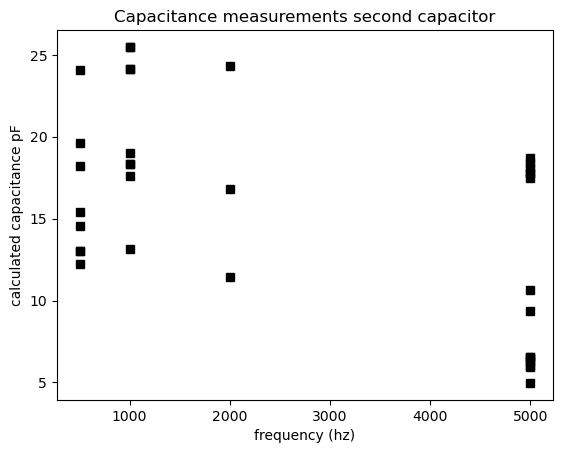

In [4]:
# put in oscilloscope impedence values
Cs = 1*scc.pico
Rs = 10*scc.mega


# comparison with data
# read in data from spreadsheet
fn = 'Capacitance1.csv'
df = pd.read_csv(fn)

V = df["Voltage (mv) "].to_numpy()
R = df["Resistance (MΩ)"].to_numpy()
f = df["Frequency (KHz)"].to_numpy()
A = V/1000
R = R*scc.mega
omega = f*2*np.pi*1000
y = capacitance(omega,R,Cs,Rs,A)
plt.plot(omega/2/np.pi,y/scc.pico,'ks')
plt.xlabel('frequency (hz)')
plt.ylabel('calculated capacitance pF')
plt.title('Capacitance measurements second capacitor')